# Part II - Explanatory Visualization of Prosper Loan
## by OPARA FEBECHUKWU CHINONYEREM

## Investigation Overview
>The goal of this presentation is as follows:

> The relationship between LenderYield, ProsperScore and EstimatedReturn: To expose that some Loans of higher risk were estimated to give a negative return but they turned out to give a positive yield of 0.15+, which implies that Prosper could venture into higher risk taking by issuing loans of higher risk that would give higher returns and shoulder the risk by having more friends investing in the loan as was seen  that not much friends were investing in Prosper loans.

> The relationship between BorrowerRate, EstimatedLoss and LoanStatus: To expose that more loans of higher borrower rate which will result to high estimated returns (though a great loss at default) should be issued and as can be seen that a fewer set of such loans existing were actually completed, controlled risk taking is adviced.

> The relationship between MonthlyLoanPayment, LoanOriginalAmount and LoanStatus: To expose that Prosper is residing in their comfort zone and is not taking much risk in giving higher figures of loans as the region of 30000 to 35000 LoanOriginalAmount was not dense even when loans in that bracket were completed.

> The relationship existing between StatedMonthlyIncome, LoanOriginalAmount, and LoanStatus: To expose that Prosper was not considering the stated monthly income in issuing out loans of particular sizes. Also to expose that individuals with high stated monthly income were not being issued higher loans and individuals woth lower income issued small figure loans, which resulted to some high figure loans issued to low income earners being defaulted.

> The relationship between BorrowerRate, LoanOriginalAmount and LenderYield: To expose that though Prosper portfolio is quite healthy but it wasn't taken much risk by issuing high figure loans with high borrower rate as majority of loans were of the range of 0-5000 at 0.2 to 0.3 borrower rate.

> The relationship between BorrowerRate, LoanOriginalAmount and InvestmentFromFriendsAmount: To expose that loans of 30000 and above have no friedns investment backing it up and higher loans were not issued at higher interest rate to reduce the risk associated with such loans in terms of their high yield incase of a default in the first few months.


## Dataset Overview
> The dataset is Prosper Loan data, which contains 82 fields. We focused on these fields in our exploration, which are:
1. TotalProsperLoans: Number of Prosper loans the borrower had at the time they created this listing. This value will be null if the borrower had no prior loans.
2. OnTimeProsperPayments: Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.
3. ProsperPaymentsLessThanOneMonthLate: Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.
4. ProsperPaymentsOneMonthPlusLate: Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.
5. ProsperPrincipalBorrowed: Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.
6. ProsperPrincipalOutstanding:Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.
7. LoanCurrentDaysDelinquent: The number of days delinquent.
8. LoanFirstDefaultedCycleNumber: The cycle the loan was charged off. If the loan has not charged off the value will be null.
9. LoanMonthsSinceOrigination: Number of months since the loan originated.
10. LoanOriginalAmount: The origination amount of the loan.
11. LoanOriginationDate:The date the loan was originated.
12. MonthlyLoanPayment:The scheduled monthly loan payment.
13. LP_CustomerPayments: Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
14. LP_CustomerPrincipalPayments: Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
15. LP_InterestandFees: Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.
16. LP_GrossPrincipalLoss: The gross charged off amount of the loan.
17. LP_NetPrincipalLoss: The principal that remains uncollected after any recoveries.
18. Investors: The number of investors that funded the loan.
19. LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
20. Recommendations: Number of recommendations the borrower had at the time the listing was created.
21. InvestmentFromFriendsCount: Number of friends that made an investment in the loan.
22. InvestmentFromFriendsAmount: Dollar amount of investments that were made by friends.
23. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
24. Term: The length of the loan expressed in months.
25. MemberKey: The unique key that is associated with the borrower. This is the same identifier that is used in the API member object.
26. DebtToIncomeRatio:The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
27. LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
28. BorrowerRate:The Borrower's interest rate for this loan.
29. EstimatedEffectiveYield: Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.
30. EstimatedLoss: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
31. EstimatedReturn: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
32. ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. 

> Nevertheless, primarily the fields of interest were:
1. LoanStatus
2. BorrowerAPR
3. BorrowerRate
4. LenderYield
5. EstimatedEffectiveYield
6. EstimatedLoss
7. EstimatedReturn
8. ProsperScore
9. Term

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('abit_clean_prosper_loan.csv')
df_loan.head()

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Functions for Visual Presentations

#multivariate scatter plot
def facetedScatterPlot(df, hueColumn, siz, colX, colY, xscale, yscale, xticks, yticks,palete):
    g=sb.FacetGrid(data=df,hue=hueColumn,height=siz,aspect=1.5,palette=palete)
    g.map(plt.scatter, colX, colY)
    if xscale=='log':
        g.set(xscale='log')
    if yscale=='log':
        g.set(xscale='log')
    if xticks != []:
        g.set(xticks=xticks, xticklabels=xticks)
    if yticks != []:
        g.set(yticks=yticks, yticklabels=yticks)
    g.add_legend()
    
#multivariate heat map
def heatMap(df, min_x, max_x, step_x, colX, min_y, max_y,step_y, colY, colZ):
    bins_x = np.arange(min_x, max_x+step_x,step_x)
    bins_y = np.arange(min_y, max_y+step_y,step_y)
    #draw 2d histogram - heat map
    plt.hist2d(data=df, x=colX, y=colY, cmin=0.5,cmap='viridis_r',  bins=[bins_x,bins_y], weights=df[colZ]);

## (Visualization 1)

>**The relationship between LenderYield, ProsperScore and EstimatedReturn:** The plot below exposes that some Loans of higher risk were estimated to give a negative return but they turned out to give a positive yield of 0.15+, which implies that Prosper could venture into higher risk taking by issuing loans of higher risk that would give higher returns and shoulder the risk by having more friends investing in the loan as was seen  that not much friends were investing in Prosper loans.

Text(0.5, 1.0, 'Multivariate Plot of Prosper Score, Estimated Return and Lender Yield')

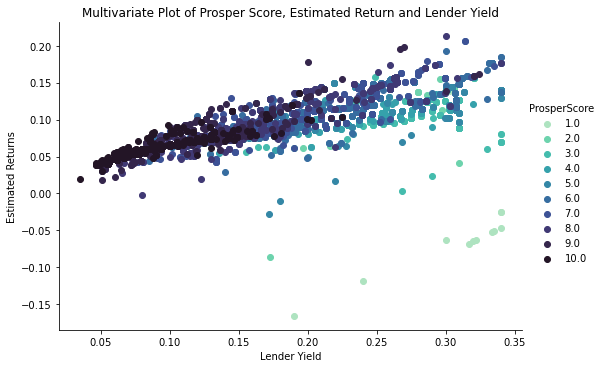

In [4]:
facetedScatterPlot(df_loan.sample(7000), 'ProsperScore', 5, 'LenderYield', 'EstimatedReturn', 'none', 'none', [], [],'mako_r');
plt.xlabel('Lender Yield')
plt.ylabel('Estimated Returns')
plt.title('Multivariate Plot of Prosper Score, Estimated Return and Lender Yield')

Text(0.5, 1.0, 'Multivariate Plot of Prosper Score, Estimated Return and Investment from Friends Amount')

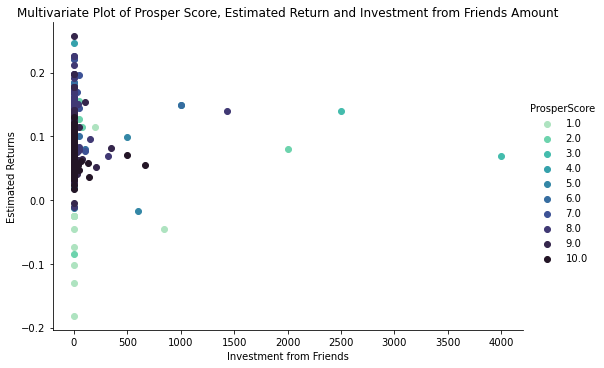

In [5]:
facetedScatterPlot(df_loan.sample(7000), 'ProsperScore', 5, 'InvestmentFromFriendsAmount', 'EstimatedReturn', 'none', 'none', [], [],'mako_r');
plt.xlabel('Investment from Friends')
plt.ylabel('Estimated Returns')
plt.title('Multivariate Plot of Prosper Score, Estimated Return and Investment from Friends Amount')

## (Visualization 2)

>**The relationship between BorrowerRate, EstimatedLoss and LoanStatus:** This plot is mearnt to expose that more loans of higher borrower rate which will result to high estimated returns (though a great loss at default) should be issued and as can be seen that a fewer set of such loans existing were actually completed, controlled risk taking is adviced.

Text(36.31260995370371, 0.5, 'Estimated Loss')

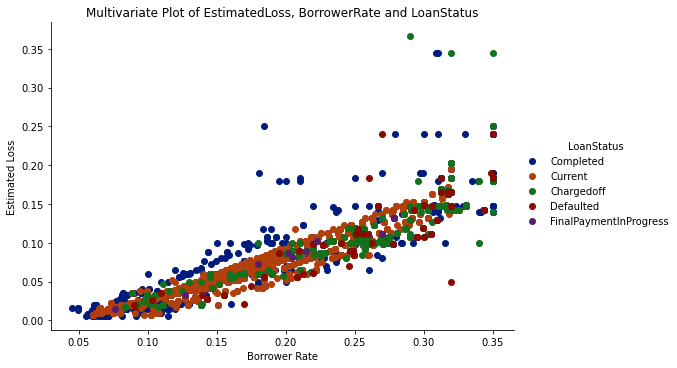

In [8]:
facetedScatterPlot(df_loan.sample(7000), 'LoanStatus', 5, 'BorrowerRate', 'EstimatedLoss', 'none', 'none', [], [],'dark');
plt.title('Multivariate Plot of EstimatedLoss, BorrowerRate and LoanStatus')
plt.xlabel('Borrower Rate')
plt.ylabel('Estimated Loss')

## (Visualization 3)
> **The relationship between MonthlyLoanPayment, LoanOriginalAmount and LoanStatus:** The plot below is mearnt to expose that Prosper is residing in their comfort zone and is not taking much risk in giving higher figures of loans as the region of 30000 to 35000 LoanOriginalAmount was not dense even when loans in that bracket could be completed with adequate backup of friends investment.



Text(39.03286458333335, 0.5, 'Loan Original Amount')

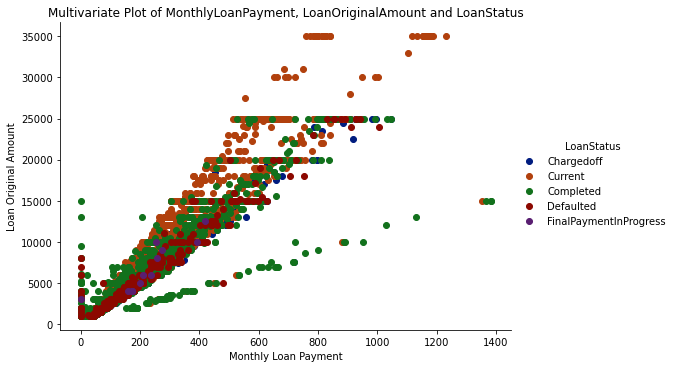

In [9]:
facetedScatterPlot(df_loan.sample(7000), 'LoanStatus', 5, 'MonthlyLoanPayment', 'LoanOriginalAmount', 'none', 'none', [], [],'dark');
plt.title('Multivariate Plot of MonthlyLoanPayment, LoanOriginalAmount and LoanStatus')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount')

## (Visualization 4)
> **The relationship existing between StatedMonthlyIncome, LoanOriginalAmount, and LoanStatus:** To expose that Prosper was not considering the stated monthly income in issuing out loans of particular sizes. Also to expose that individuals with high stated monthly income were not being issued higher loans and individuals woth lower income issued small figure loans, which resulted to some high figure loans issued to low income earners being defaulted.

Text(39.03286458333335, 0.5, 'Loan Original Amount')

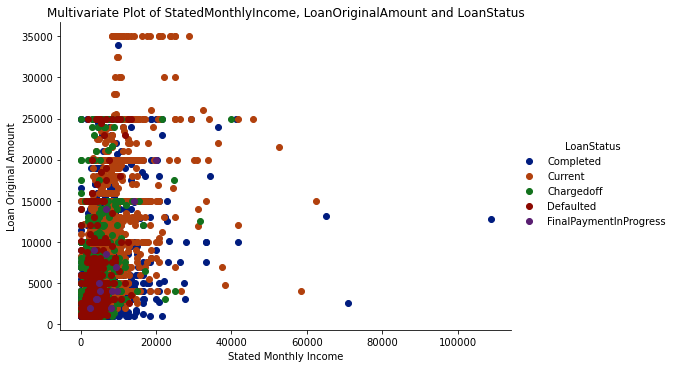

In [11]:
facetedScatterPlot(df_loan.sample(7000), 'LoanStatus', 5, 'StatedMonthlyIncome', 'LoanOriginalAmount', 'none', 'none', [], [],'dark');
plt.title('Multivariate Plot of StatedMonthlyIncome, LoanOriginalAmount and LoanStatus')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Original Amount')

## (Visualization 5)
> **The relationship between BorrowerRate, LoanOriginalAmount and LenderYield:** To expose that though Prosper portfolio is quite healthy but it wasn't taken much risk by issuing high figure loans with high borrower rate as majority of loans were of the range of 0-5000 at 0.2 to 0.3 borrower rate.

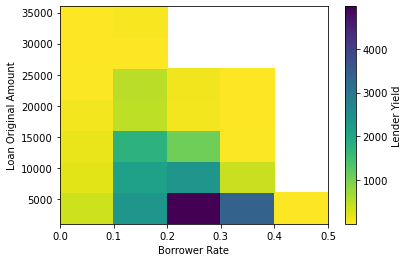

In [12]:
heatMap(df_loan, 0, 0.4925, 0.1, 'BorrowerRate', 1000, 35000,5000, 'LoanOriginalAmount', 'LenderYield')
plt.xlabel('Borrower Rate')
plt.ylabel('Loan Original Amount')
plt.colorbar(label='Lender Yield')

## (Visualization 6)
> **The relationship between BorrowerRate, LoanOriginalAmount and InvestmentFromFriendsAmount:** To expose that loans of 30000 and above have no friends investment backing it up and higher loans were not issued at higher interest rate to reduce the risk associated with such loans in terms of their high yield incase of a default in the first few months.

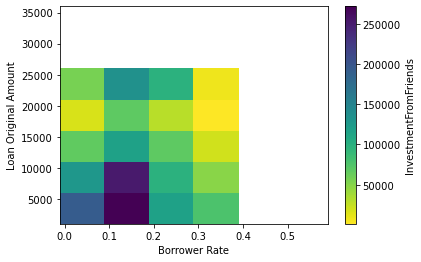

In [13]:
heatMap(df_loan, -0.01, 0.4925, 0.1, 'BorrowerRate', 1000, 35000,5000, "LoanOriginalAmount", "InvestmentFromFriendsAmount")
plt.xlabel('Borrower Rate')
plt.ylabel('Loan Original Amount')
plt.colorbar(label='InvestmentFromFriends')